# Plotting with matplotlib (4)

[Matplotlib](https://matplotlib.org/) is a powerful and very popular data visualization library in Python.

# Specialized visualization tools: bubble plots, waffle charts, word clouds

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts
from PIL import Image # converting images into arrays
%matplotlib inline

plt.style.use('default')

# Bubble Plots

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). 

* The data points are represented as bubbles.
* The size of the bubble is determined by the third variable `z`, also known as the weight. 
* In `maplotlib`, we can use the scatter function and pass in an array or scalar to the parameter `s` to `plot()`, that contains the weight of each point.

## First Example

Parameters of `scatter` function used:
* **x** : The data position on the x axis
* **y** : The data position on the y axis
* **s** : The marker size
* **alpha** : Transparancy ratio

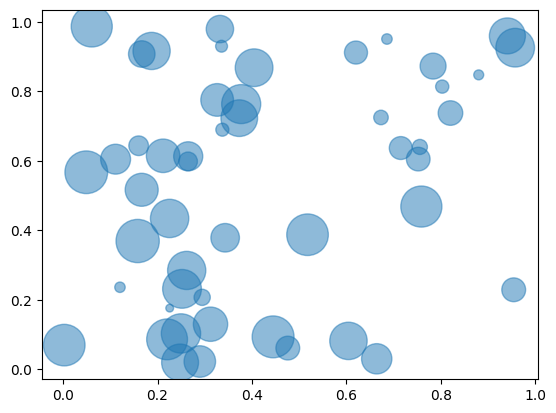

In [3]:
# create data
x = np.random.rand(50)
y = np.random.rand(50)
z = np.random.rand(50)
 
# use the scatter function
plt.scatter(x, y, s=z*1000, alpha=0.5)
plt.show()

Add colors:

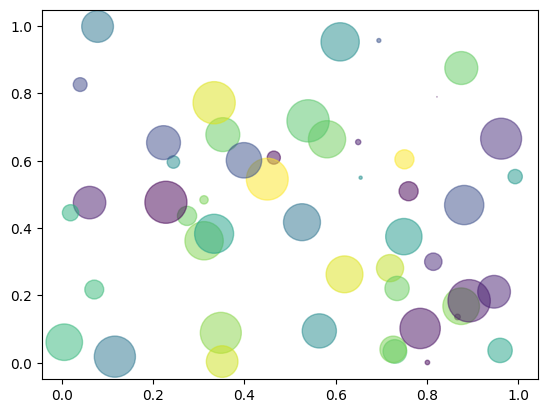

In [4]:
x = np.random.rand(50)
y = np.random.rand(50)
z = np.random.rand(50)
colors = np.random.rand(50)

plt.scatter(x, y, s=z*1000, c=colors, alpha=0.5)
plt.savefig("bubbles")
plt.show()

Bubble plots with a different shape:

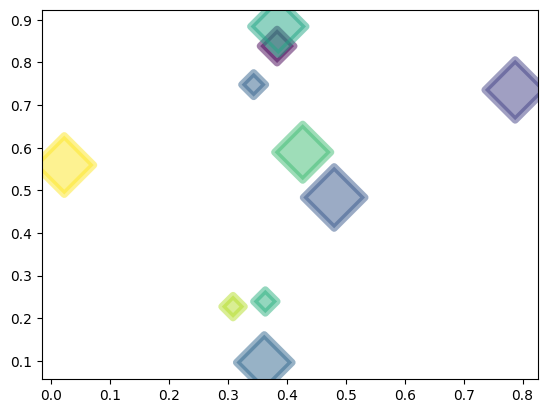

In [6]:
x = np.random.rand(10)
y = np.random.rand(10)
z = np.random.rand(10)
colors = np.random.rand(10)

plt.scatter(x, y, s=z*1000, marker='D', linewidth=5, c=colors, alpha=0.5)
plt.show()

## Second Example

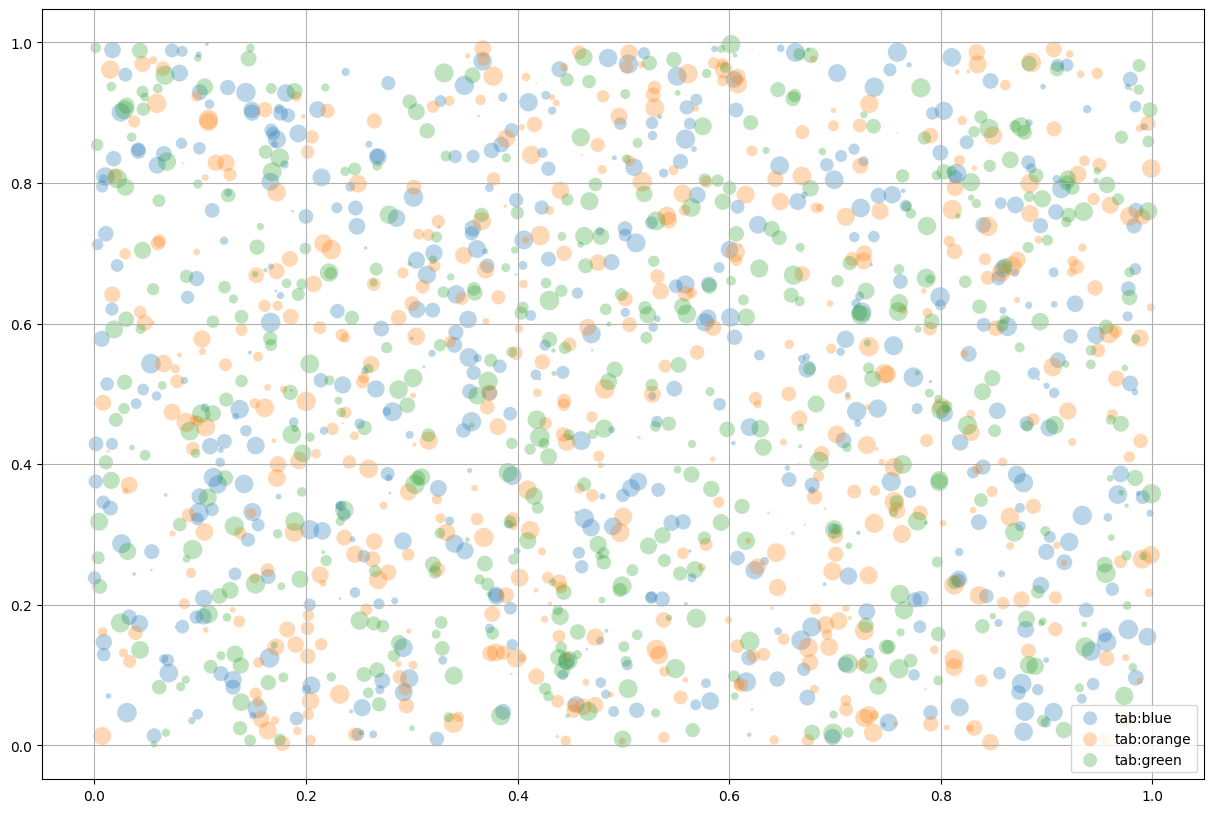

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 500
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

26


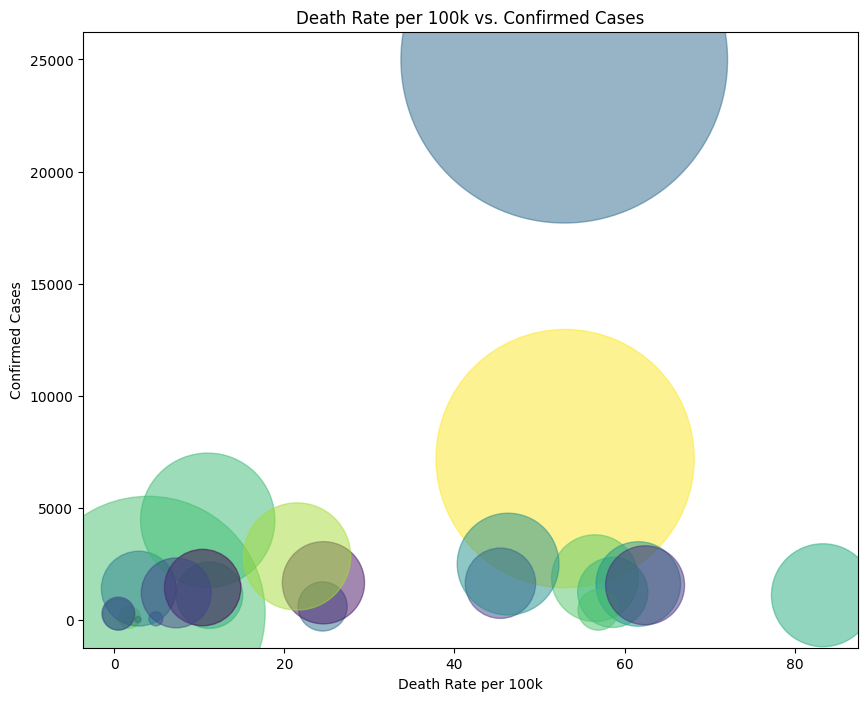

In [8]:
# Country array
countries = np.array(['Australia','Brazil','Canada','Chile','France','Germany','Greece',
                   'Iceland','India','Iran','Italy','Mexico','New Zealand','Nigeria',
                   'Norway','Pakistan','Peru','Russia','Saudi Arabia','Singapore',
                   'South Africa','Spain','Sweden','Turkey','UK','US'])
# Death rate per 100k Coronavirus
drates = np.array([1.8,53,24.5,56.5,45.4,11.2,2.2,
                   2.8,4,24.6,58.6,46.3,.5,.5,
                   4.9,2.9,83.3,11,10.4,.5,
                   21.5,61.6,56.9,7.3,62.4,52.9])
# Daily confirmed cases (Tests)
tests = np.array([110,7197,600,1862,1636,1103,35,
                   10,295,1658,1226,2490,8,243,
                   48,1395,1101,4447,1443,280,
                   2830,1602,447,1205,1546,24988])
# Dot size Confirmed cases
cc = np.array([24236,3456652,125408,390037,256534,229706,7684,
                   2035,2836925,350279,255278,537031,1654,50488,
                   10162,290445,549321,935066,302686,56031,
                   596060,370867,85411,253108,323008,5529824])
cc_sm = cc / 100
print(len(countries))
colors = np.random.rand(len(countries)) # there 26 countries 

plt.figure(figsize=(10,8))
plt.title('Death Rate per 100k vs. Confirmed Cases')
plt.xlabel('Death Rate per 100k')
plt.ylabel('Confirmed Cases')
plt.scatter(drates, tests, s=cc_sm, c=colors, alpha=0.5)
plt.show()

## Bubble plot from a simple dataframe

In [9]:
np.random.seed(42)
N = 100
x = np.random.normal(170, 20, N)
y = x + np.random.normal(5, 25, N)
colors = np.random.rand(N)
area = (25 * np.random.rand(N))**2

df = pd.DataFrame({
    'X': x,
    'Y': y,
    'Colors': colors,
    "bubble_size":area})

df.head()

X           Y    Colors  bubble_size
0  179.934283  149.550015  0.877373   553.972491
1  167.234714  161.718581  0.740769    93.172029
2  182.953771  179.385908  0.697016   577.429562
3  200.460597  185.403665  0.702484   512.287366
4  165.316933  166.284790  0.359491    23.958855

Text(0, 0.5, 'y')

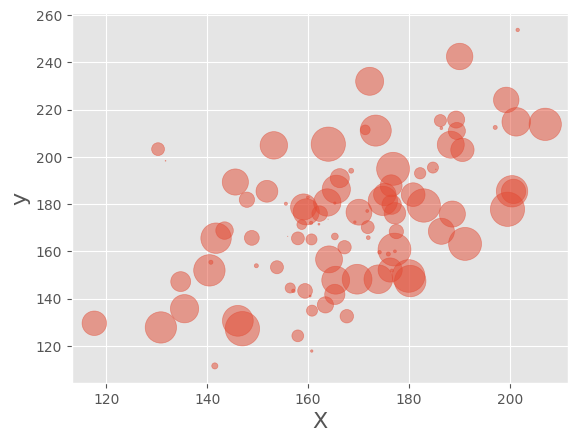

In [10]:
plt.style.use('ggplot')
plt.scatter('X', 'Y', s='bubble_size',alpha=0.5, data=df)
plt.xlabel("X", size=16)
plt.ylabel("y", size=16)

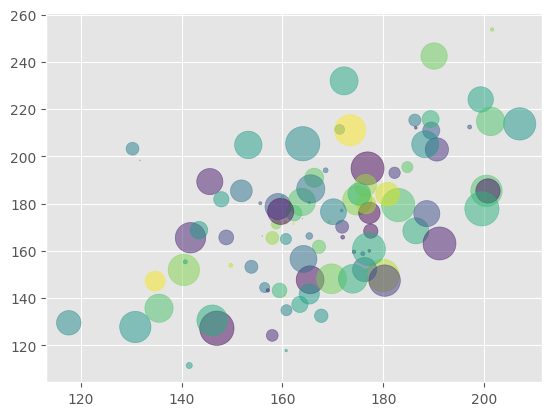

In [11]:
plt.scatter('X', 'Y', s='bubble_size', c='Colors', alpha=0.5, data=df)
plt.show()

## Bubble Plots for the Canada Immigration Dataset

Analyze the effect of Argentina's great depression which took place from 1998 to 2002 (https://en.wikipedia.org/wiki/1998%E2%80%932002_Argentine_great_depression).

* We can analyze the effect of this crises by using bubble plots.
* We compare Argentina's immigration to that of Brazil using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. 
* The weights for the bubble are set as the *normalized* value of the population for each year.


*Dataset Preparation*

In [12]:
df_canada = pd.read_excel("data/Canada.xlsx", 
                    sheet_name="Canada by Citizenship",
                    skiprows=range(20),
                    skipfooter=2)

# 1. Remove columns that are not necessary
df_canada.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# 2. Rename some columns
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# 3. Column labels should be strings
df_canada.columns = list(map(str, df_canada.columns))

# 4. Set the index to the country column
df_canada.set_index('Country', inplace=True)

# 5. Add an extra column: Total
df_canada['Total'] = df_canada.sum(axis=1, numeric_only = True)

# Create a list of years from 1980 - 2013 as strings
years = list(map(str, range(1980, 2014)))

# Check the data
print('data dimensions:', df_canada.shape)
df_canada.head()

data dimensions: (195, 38)


Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Country                                       ...                           
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0   
Andorra            0     0     0     0     2  ...     0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Country                                              
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

In [11]:
df_canada.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Country                                       ...                           
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0   
Andorra            0     0     0     0     2  ...     0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Country                                              
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

**Get the data for Argentina and Brazil.**

In [13]:
df_canada_t = df_canada[years].transpose()

df_canada_t.head()

Country  Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
1980              16        1       80               0        0       1   
1981              39        0       67               1        0       3   
1982              39        0       71               0        0       6   
1983              47        0       69               0        0       6   
1984              71        0       63               0        0       4   

Country  Antigua and Barbuda  Argentina  Armenia  Australia  ...  \
1980                       0        368        0        702  ...   
1981                       0        426        0        639  ...   
1982                       0        626        0        484  ...   
1983                       0        241        0        317  ...   
1984                      42        237        0        317  ...   

Country  United States of America  Uruguay  Uzbekistan  Vanuatu  \
1980                         9378      128           0        0   
1981                        10030      132           0        0   
1982                         9074      146           0        0   
1983                         7100      105           0        0   
1984                         6661       90           0        0   

Country  Venezuela (Bolivarian Republic of)  Viet Nam  Western Sahara  Yemen  \
1980                                    103      1191               0      1   
1981                                    117      1829               0      2   
1982                                    174      2162               0      1   
1983                                    124      3404               0      6   
1984                                    142      7583               0      0   

Country  Zambia  Zimbabwe  
1980         11        72  
1981         17       114  
1982         11       102  
1983          7        44  
1984         16        32  

[5 rows x 195 columns]

In [14]:
# cast the Years (the index) to type int
df_canada_t.index = map(int, df_canada_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_canada_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_canada_t.reset_index(inplace=True)

# view the changes
df_canada_t.head()

Country  Year  Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
0        1980           16        1       80               0        0       1   
1        1981           39        0       67               1        0       3   
2        1982           39        0       71               0        0       6   
3        1983           47        0       69               0        0       6   
4        1984           71        0       63               0        0       4   

Country  Antigua and Barbuda  Argentina  Armenia  ...  \
0                          0        368        0  ...   
1                          0        426        0  ...   
2                          0        626        0  ...   
3                          0        241        0  ...   
4                         42        237        0  ...   

Country  United States of America  Uruguay  Uzbekistan  Vanuatu  \
0                            9378      128           0        0   
1                           10030      132           0        0   
2                            9074      146           0        0   
3                            7100      105           0        0   
4                            6661       90           0        0   

Country  Venezuela (Bolivarian Republic of)  Viet Nam  Western Sahara  Yemen  \
0                                       103      1191               0      1   
1                                       117      1829               0      2   
2                                       174      2162               0      1   
3                                       124      3404               0      6   
4                                       142      7583               0      0   

Country  Zambia  Zimbabwe  
0            11        72  
1            17       114  
2            11       102  
3             7        44  
4            16        32  

[5 rows x 196 columns]

In [15]:
df_canada_t['Argentina']

0      368
1      426
2      626
3      241
4      237
5      196
6      213
7      519
8      374
9      538
10     678
11     763
12    1023
13    1022
14     366
15     380
16     396
17     391
18     349
19     318
20     427
21     635
22     865
23    1745
24    1591
25    1153
26     847
27     620
28     540
29     467
30     459
31     278
32     263
33     282
Name: Argentina, dtype: int64

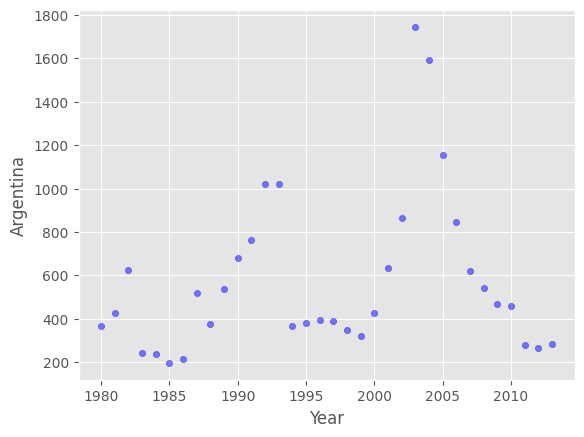

In [16]:
# this is a scatter plot, not a bubble plot
df_canada_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue"
                    )
plt.show()

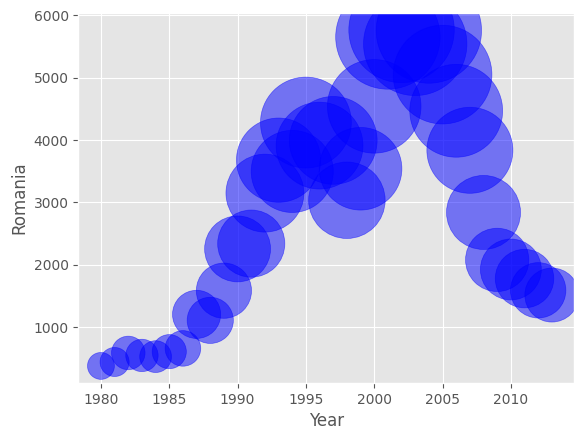

In [23]:
# this is a scatter plot, not a bubble plot
df_canada_t.plot(kind='scatter',
                    x='Year',
                    y='Romania',
                    alpha=0.5,
                    color="blue",
                    s='Romania'
                    )
plt.show()

To know the size of each bubble, we need to normalize the data.

**Normalization**

For normalization, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) to bring all values into the range \[0, 1]. 

The general formula is:

<img src="images/FeatureScaling.png" align="center">

where $X$ is the original value, $X'$ is the corresponding normalized value. 

In [17]:
# normalize Argentina data
norm_argentina = (df_canada_t['Argentina'] - df_canada_t['Argentina'].min()) / (df_canada_t['Argentina'].max() - df_canada_t['Argentina'].min())

# normalize Brazil data
norm_brazil = (df_canada_t['Brazil'] - df_canada_t['Brazil'].min()) / (df_canada_t['Brazil'].max() - df_canada_t['Brazil'].min())

In [18]:
print(type(norm_argentina))
norm_argentina

<class 'pandas.core.series.Series'>


0     0.111039
1     0.148483
2     0.277598
3     0.029051
4     0.026469
5     0.000000
6     0.010975
7     0.208522
8     0.114913
9     0.220788
10    0.311168
11    0.366043
12    0.533893
13    0.533247
14    0.109748
15    0.118786
16    0.129116
17    0.125888
18    0.098773
19    0.078760
20    0.149128
21    0.283409
22    0.431892
23    1.000000
24    0.900581
25    0.617818
26    0.420271
27    0.273725
28    0.222079
29    0.174952
30    0.169787
31    0.052937
32    0.043254
33    0.055520
Name: Argentina, dtype: float64

**Plot the data.**

*   To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter.
*   We will also pass in the weights using the `s` parameter of the `scatter` function. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
    *   multiply weights by 2000 to scale it up on the graph, and,
    *   add 10 to compensate for the min value (which has a 0 weight and therefore scale with $\times 2000$).

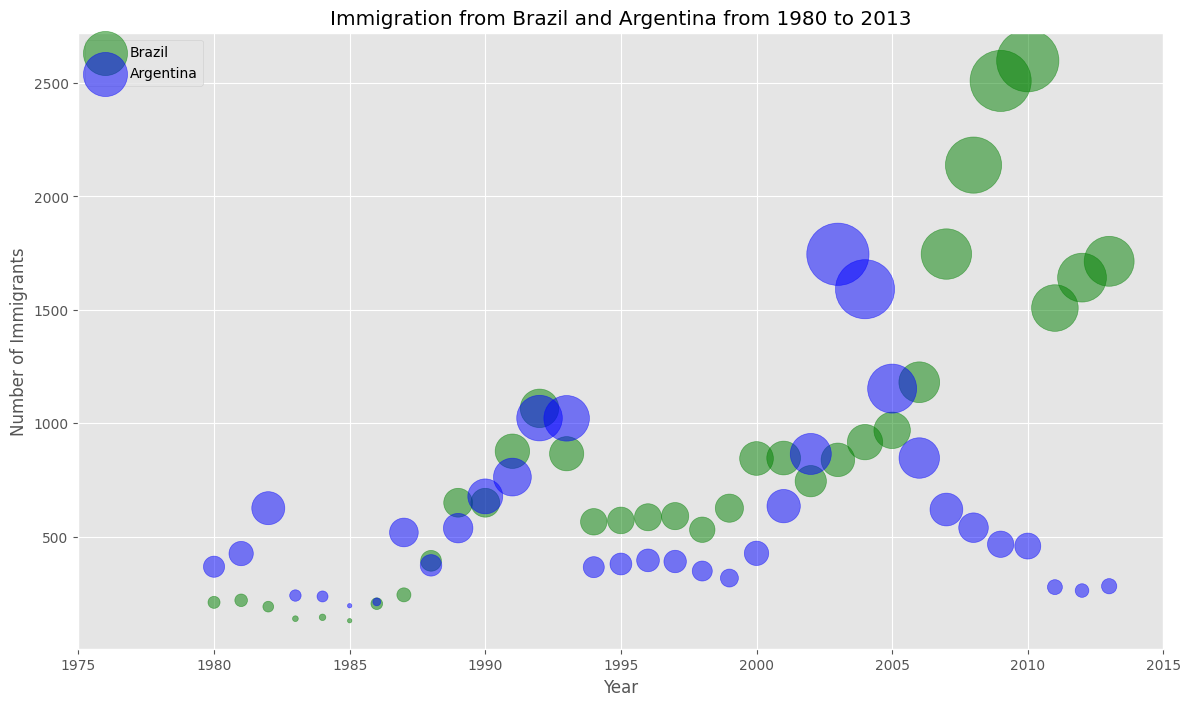

In [19]:
# Brazil
ax0 = df_canada_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_canada_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left') #, fontsize='x-large'
plt.show()

The size of the bubble corresponds to the magnitude of immigrating population for that year: the larger the bubble is, the more immigrants are in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993 explained by another crises in Argentina from 1974 to 1990.

**<p style="color:red">EXERCISE 1</p>**

Create a bubble plot to analyze the immigration from Romania, Hungary and Bulgaria for the period 1980-2013. Make sure that:

* You specify a different color for each bubble trend e.g. blue, orange, green.
* Add a title to the plot.
* Add a title to each axis.
* Add a legend.

In [19]:
# Your solution here...



# Waffle Charts

A `waffle chart` is a popular visualization tool in data science and analytics.

* It allows data visualization by displaying progress toward goals. 
* The visual consists mainly of cells, such as an Excel dashboard.
* Also known as *square pie charts*.


## Creating Waffle Charts from scratch for the Canada Immigration Dataset

A case study about Denmark, Norway and Sweden using waffle charts.

In [24]:
# Create a new dataframe for these three countries 
df_dns = df_canada.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dns

Continent           Region            DevName  1980  1981  1982  1983  \
Country                                                                         
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   

         1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  2011  \
Country                    ...                                             
Denmark    93    73    93  ...    62   101    97   108    81    92    93   
Norway     31    54    56  ...    57    53    73    66    75    46    49   
Sweden    128   158   187  ...   205   139   193   165   167   159   134   

         2012  2013  Total  
Country                     
Denmark    94    81   3901  
Norway     53    59   2327  
Sweden    140   140   5866  

[3 rows x 38 columns]

In [25]:
# compute the proportion of each category with respect to the total
total_values = df_dns['Total'].sum()
category_proportions = df_dns['Total'] / total_values

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

Category Proportion
Country                     
Denmark             0.322557
Norway              0.192409
Sweden              0.485034

In [26]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


In [27]:
# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

Number of tiles
Country                 
Denmark              129
Norway                77
Sweden               194

So, Denmark will occupy 129 tiles of the `waffle` chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.

In [28]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [25]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 640x480 with 0 Axes>

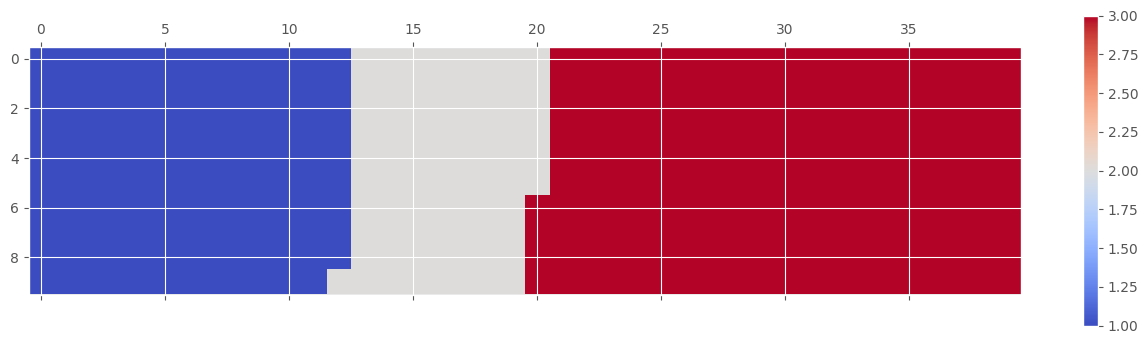

In [29]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

Make it look a bit better.

<Figure size 640x480 with 0 Axes>

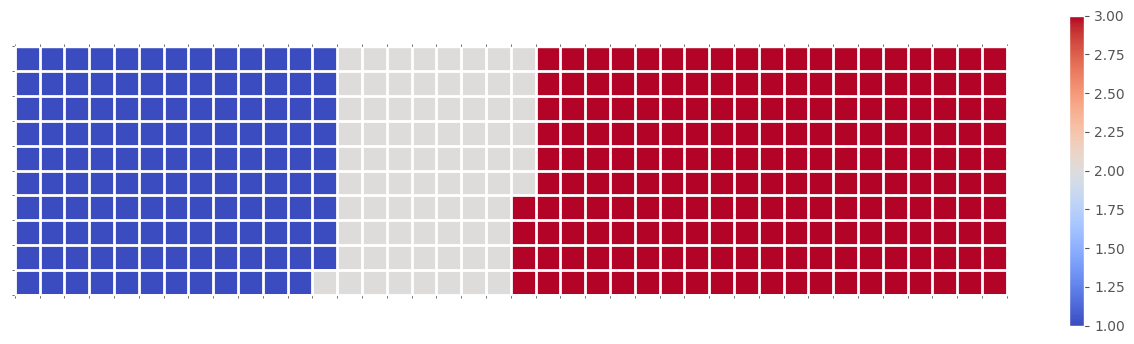

In [30]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

Add a legend.

<Figure size 640x480 with 0 Axes>

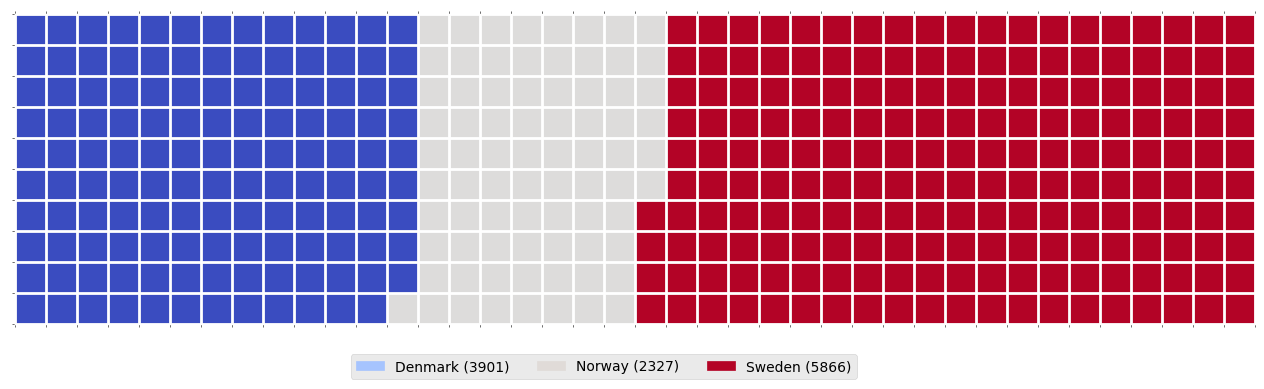

In [31]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dns['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dns.index.values):
    label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dns.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

**Add all of the above code to a function `create_waffle_chart`**

with parameters:

> 1.  **categories**: Unique categories or classes in dataframe.
> 2.  **values**: Values corresponding to categories or classes.
> 3.  **height**: Defined height of waffle chart.
> 4.  **width**: Defined width of waffle chart.
> 5.  **colormap**: Colormap class
> 6.  **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.

In [32]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dns.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    #plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

**Using the `create_waffle_chart` function:**

Total number of tiles is 1000
Denmark: 323
Norway: 192
Sweden: 485


<Figure size 640x480 with 0 Axes>

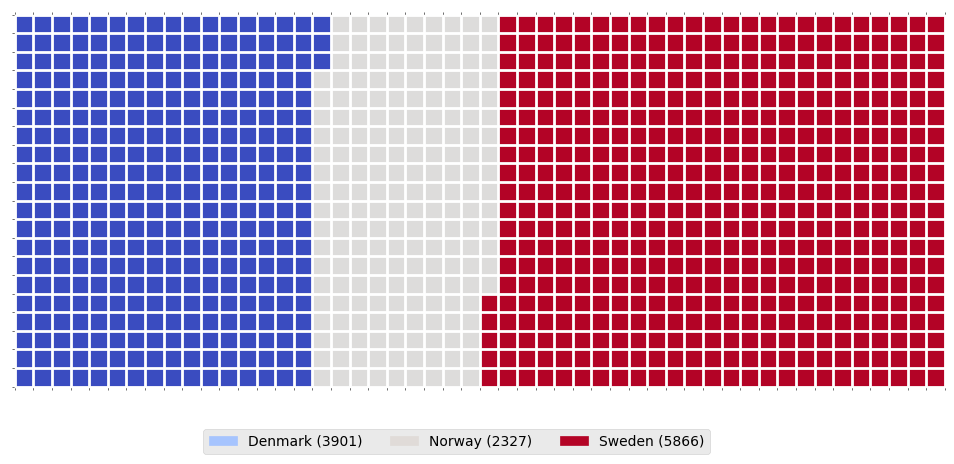

In [33]:
width = 50 # width of chart
height = 20 # height of chart

categories = df_dns.index.values # categories
values = df_dns['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

create_waffle_chart(categories, values, height, width, colormap)

## Creating Waffle Charts using the PyWaffle package

* It provides a Figure constructor class Waffle. This can be passed to matplotlib.pyplot.figure and generates a matplotlib Figure object.
* https://pypi.org/project/pywaffle/

In [34]:
from pywaffle import Waffle

### Examples from https://github.com/gyli/PyWaffle

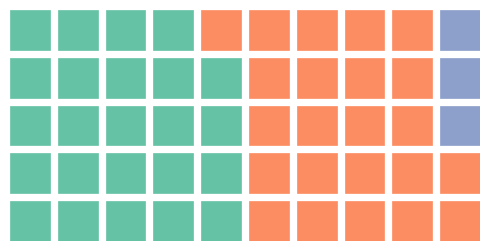

In [35]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    columns=10, 
    values=[48, 46, 6],
    figsize=(5, 3)
)
plt.show()

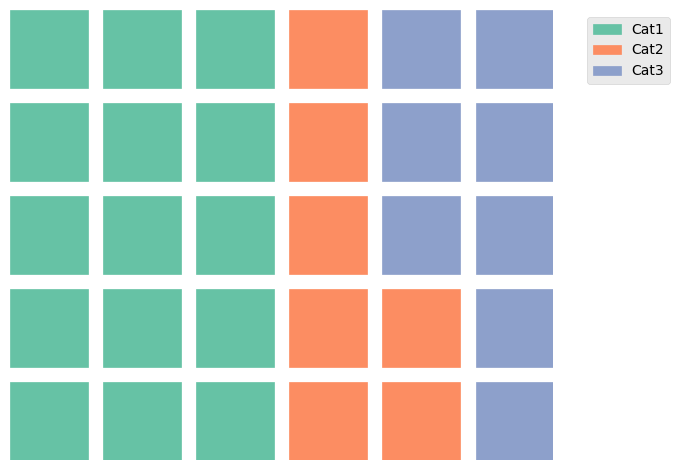

In [36]:
data = {'Cat1': 15, 'Cat2': 7, 'Cat3': 8}
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=data,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.show()

See more examples and the online demo here: https://github.com/gyli/PyWaffle

### Using PyWaffle for the Canada Immigration Dataset

The same case study about Denmark, Norway and Sweden using waffle charts, this time using the `PyWaffle` package.

In [38]:
categories = df_dns.index.values # categories
values = df_dns['Total'] # correponding values of categories

In [39]:
df_dns

Continent           Region            DevName  1980  1981  1982  1983  \
Country                                                                         
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   

         1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  2011  \
Country                    ...                                             
Denmark    93    73    93  ...    62   101    97   108    81    92    93   
Norway     31    54    56  ...    57    53    73    66    75    46    49   
Sweden    128   158   187  ...   205   139   193   165   167   159   134   

         2012  2013  Total  
Country                     
Denmark    94    81   3901  
Norway     53    59   2327  
Sweden    140   140   5866  

[3 rows x 38 columns]

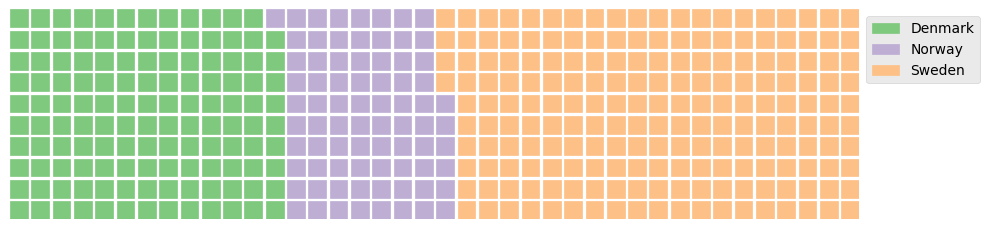

In [40]:
width = 40 # width of chart
height = 10 # height of chart

fig = plt.figure(
    FigureClass=Waffle,
    rows=height,
    columns=width,
    values=df_dns['Total'],
    labels=list(categories),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    cmap_name="Accent",  # Change color with cmap
    figsize=(10, 8)
)

plt.show()

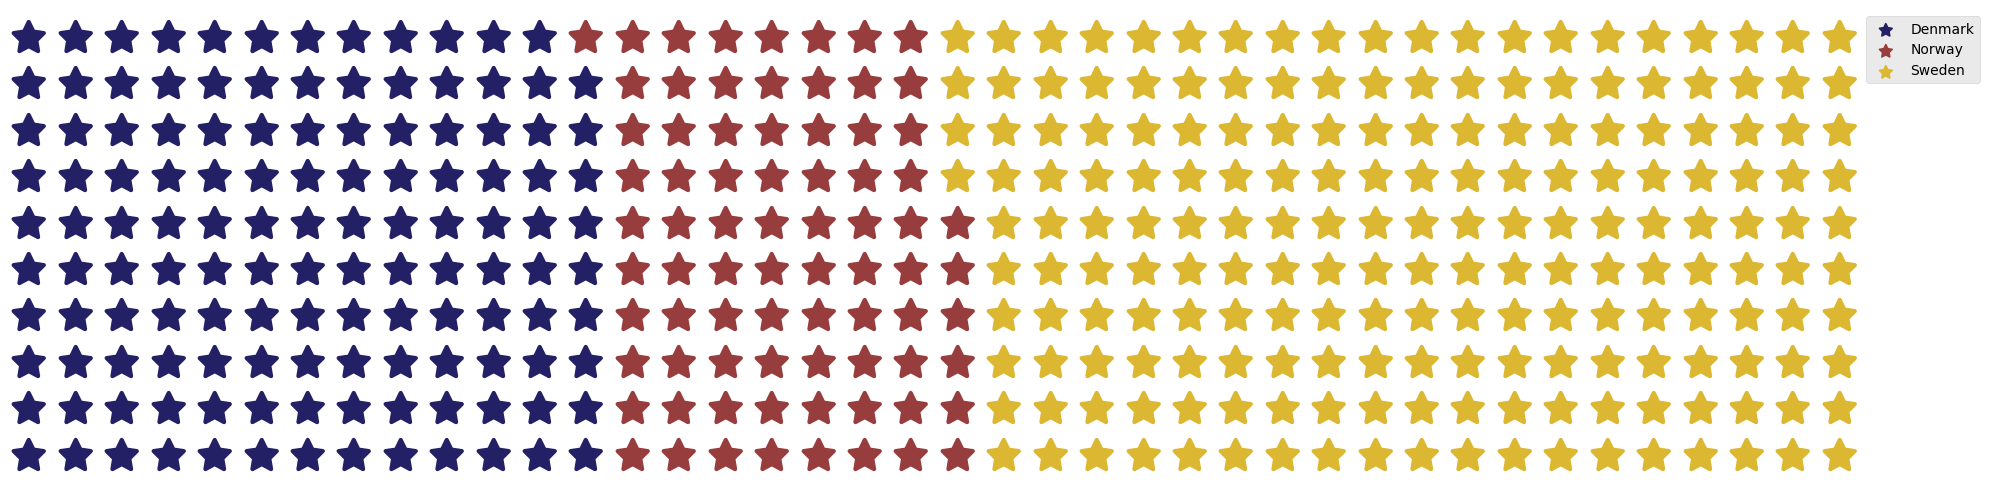

In [41]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=height,
    columns=width,
    values=df_dns['Total'],
    labels=list(categories),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    colors=["#232066", "#983D3D", "#DCB732"],
    icons='star',
    font_size=24,
    icon_legend=True,
    figsize=(20, 15)
)
plt.show()

See more examples of plotting with characters or icons here: https://pywaffle.readthedocs.io/en/latest/examples/plot_with_characters_or_icons.html

**<p style="color:red">EXERCISE 2</p>**

Create a waffle chart to analyze the immigration from Romania, Hungary and Bulgaria for the period 1980-2013.

Make use of both methods: 
1. The function `create_waffle_chart` which should be extended to `create_waffle_chart2` to ensure usage for any dataframe. The parameters of the new function should be restricted to: categories, values, colors, height, width. No print statements from the new function. The parameter *colors* is added in this version and represents a list of colours.
2. The `PyWaffle` package.

Make sure that:

* The chart has 40 X 20 tiles.
* Use the following colors for the chart: blue, orange, green (in both cases).
* Add a legend.

In [38]:
# Your solution here...




# Word Clouds

`Word Clouds` are useful for visualizing text data.

* It works in a simple way: the more a specific word appears in the text data source, the bigger and bolder it appears in the word cloud.
* The source data can be any text such as a speech, blog post, or database.
* Also known as text clouds or tag clouds.


We will use the Python package `word_cloud` to generate the following charts.

See more info on this package here: https://github.com/amueller/word_cloud/

See a gallery of examples from the author of the package here: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

In [42]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

## First Example

The file `constitution.txt` contains the Constitution of Romania.

Created based on the text available here: https://www.presidency.ro/en/the-constitution-of-romania

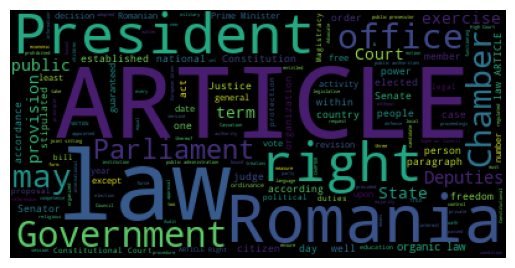

In [43]:
# Read the whole text.
text = open('data\constitution.txt').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Plot the world cloud image
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Changing the looks a bit:

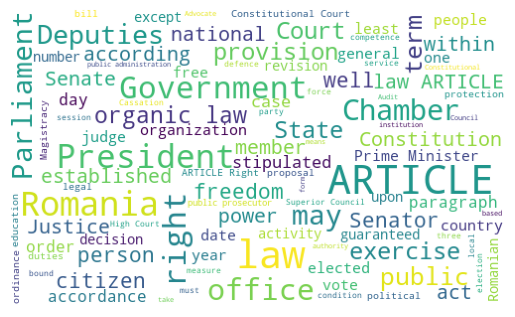

In [44]:
wordcloud = WordCloud(width = 500, height = 300, 
                      background_color ='white',
                      max_words = 100,
                      max_font_size=40).generate(text)

# store to file
wordcloud.to_file("constitution.png")

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## World Cloud Example for a Dataset

Dataset `Youtube05-Shakira.csv`: part of the **YouTube Spam Collection Data Set**

Consists of YouTube comments on videos of popular artists. 

https://www.kaggle.com/datasets/lakshmi25npathi/images?resource=download

In [45]:
df = pd.read_csv("data/Youtube05-Shakira.csv", encoding ="latin-1") 
df.head()

COMMENT_ID  \
0    z13lgffb5w3ddx1ul22qy1wxspy5cpkz504   
1      z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj   
2  z12quxxp2vutflkxv04cihggzt2azl34pms0k   
3      z12icv3ysqvlwth2c23eddlykyqut5z1h   
4      z133stly3kete3tly22petvwdpmghrlli   

                                              AUTHOR  \
0                                         dharma pal   
1                                      Tiza Arellano   
2  PrÃ¬Ã±Ã§eÅÅ ÃliÅ ÅÃ¸vÃª DÃ¸mÃ­Ã±Ã¸ MÃ¢Äi...   
3                                      Eric Gonzalez   
4                                     Analena LÃ³pez   

                         DATE  \
0  2015-05-29T02:30:18.971000   
1  2015-05-29T00:14:48.748000   
2  2015-05-28T21:00:08.607000   
3  2015-05-28T20:47:12.193000   
4  2015-05-28T17:08:29.827000   

                                             CONTENT  CLASS  
0                                       Nice songï»¿      0  
1                                    I love song ï»¿      0  
2                                    I love song ï»¿      0  
3  860,000,000 lets make it first female to reach...      0  
4                    shakira is best for worldcupï»¿      0

In [46]:
df.CONTENT

0                                           Nice songï»¿
1                                        I love song ï»¿
2                                        I love song ï»¿
3      860,000,000 lets make it first female to reach...
4                        shakira is best for worldcupï»¿
                             ...                        
365    I love this song because we sing it at Camp al...
366    I love this song for two reasons: 1.it is abou...
367                                                  wow
368                              Shakira u are so wiredo
369                           Shakira is the best dancer
Name: CONTENT, Length: 370, dtype: object

In [47]:
def plotWordCloud(df,stopwords,maxWords=500):
    comment_words = '' 
    # iterate through the csv file 
    for val in df.CONTENT: 
        # typecaste each val to string 
        val = str(val) 
        # split the value 
        tokens = val.split() 
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords,
                    max_words = maxWords,
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud 
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

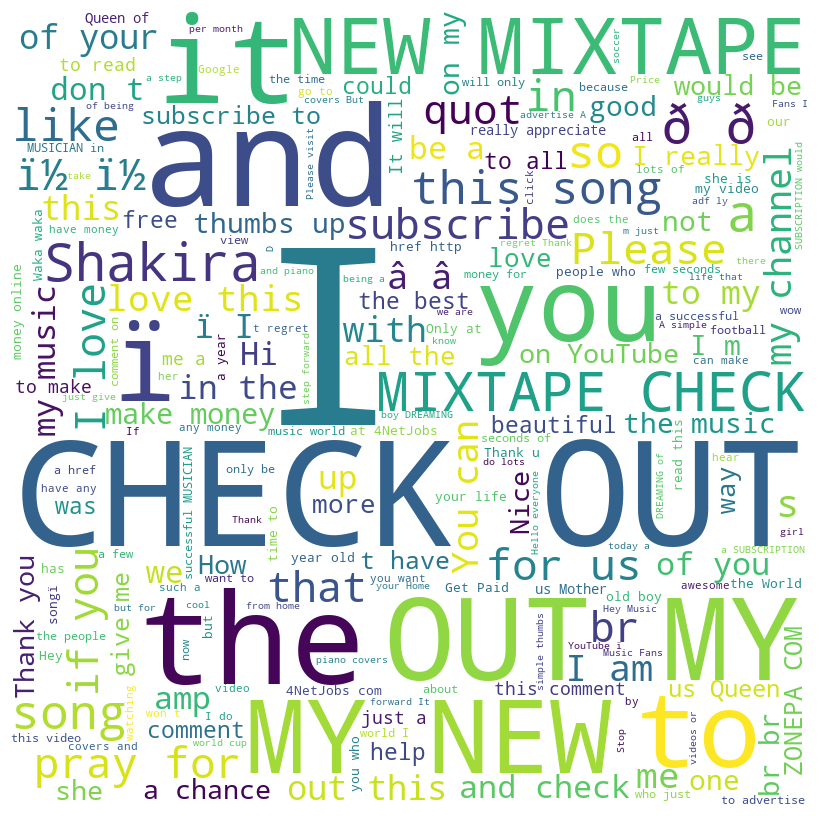

In [48]:
plotWordCloud(df,' ')

In [49]:
print(list(set(STOPWORDS)))

['any', "couldn't", "i'll", 'both', 'ourselves', 'through', 'off', 'should', 'on', 'theirs', 'else', 'it', 'but', 'was', 'were', 'you', 'how', 'during', 'does', 'nor', 'whom', 'out', 'against', 'other', 'under', "we've", 'also', "he'll", "i'd", 'of', 'them', 'an', 'further', 'www', 'since', 'yourself', 'once', 'he', 'my', "where's", 'up', 'its', 'few', 'from', "why's", 'this', 'and', "he's", 'ever', "it's", "won't", 'more', 'each', 'himself', 'down', 'into', 'with', 'hers', 'which', 'those', 'then', 'these', 'who', "they'll", 'between', 'her', 'a', 'cannot', "doesn't", "shouldn't", "wasn't", 'can', 'have', 'k', 'been', "she'll", 'hence', 'therefore', "what's", "i've", 'again', 'doing', 'most', 'is', 'myself', "he'd", 'no', 'such', "that's", "we'll", 'what', 'the', 'am', 'same', "who's", 'below', "i'm", 'very', "isn't", 'here', "they've", 'while', 'itself', 'they', 'like', 'are', 'has', "they'd", 'his', 'than', "you'd", 'that', 'being', "there's", 'http', 'or', 'at', 'in', 'after', 'be'

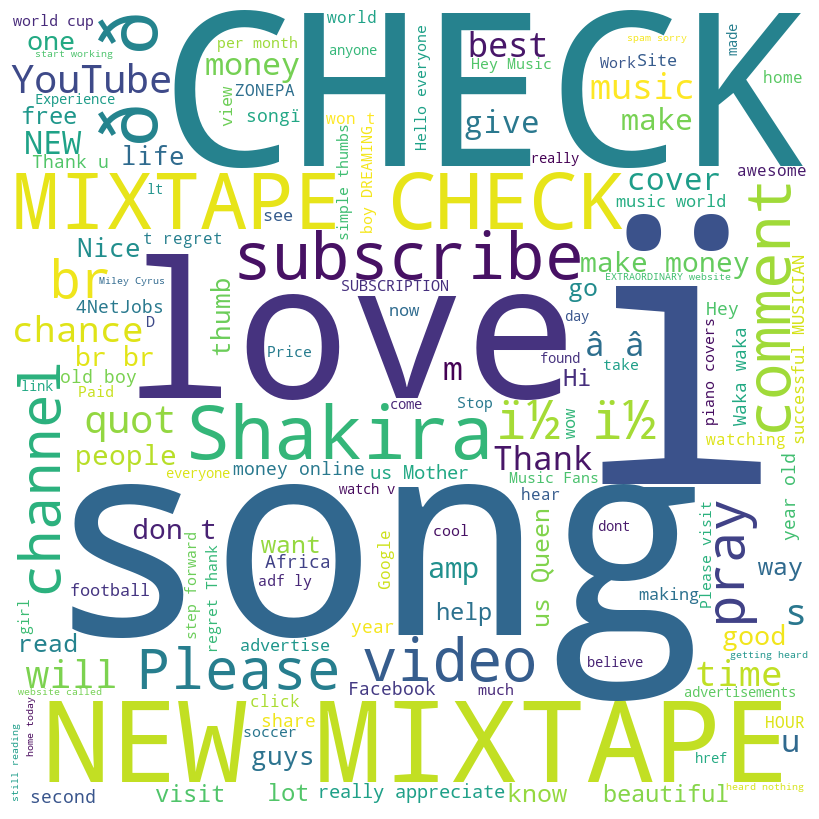

In [50]:
plotWordCloud(df,set(STOPWORDS),400)

<ipython-input-48-bc5b308b882a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CONTENT'] = df['CONTENT'].str.replace("[^a-zA-Z#]", " ")


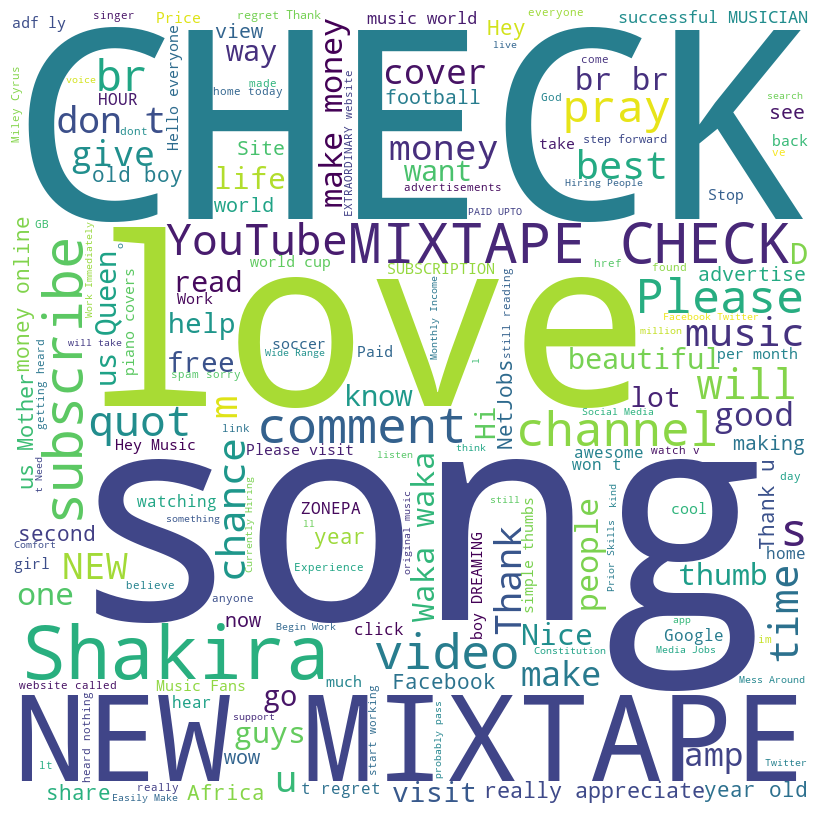

In [48]:
# removing everything except alphabets
df['CONTENT'] = df['CONTENT'].str.replace("[^a-zA-Z#]", " ")
plotWordCloud(df,set(STOPWORDS),400)

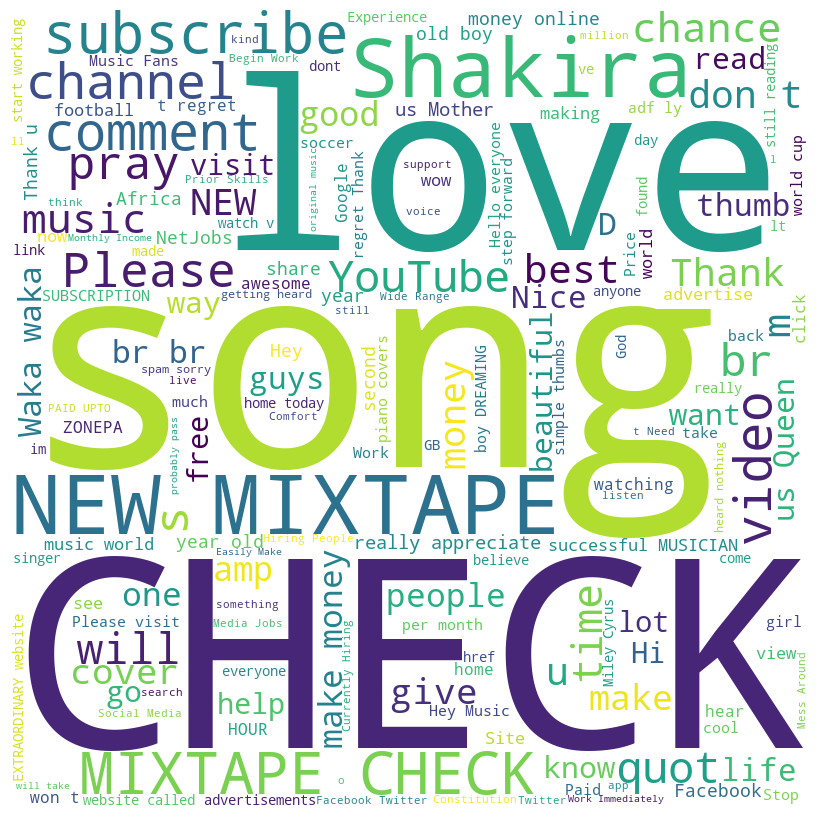

In [49]:
plotWordCloud(df,set(STOPWORDS),200)

## Analyze a book using Word Clouds

Novel: *Alice's Adventures in Wonderland* by **Lewis Carroll**

Books in txt format available here: https://www.gutenberg.org/browse/scores/top#authors-last30

In [51]:
import urllib

# open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://www.gutenberg.org/cache/epub/11/pg11.txt').read().decode("utf-8")

In [52]:
stopwords = set(STOPWORDS)

In [53]:
print(stopwords)

{'any', "couldn't", "i'll", 'both', 'ourselves', 'through', 'off', 'should', 'on', 'theirs', 'else', 'it', 'but', 'was', 'were', 'you', 'how', 'during', 'does', 'nor', 'whom', 'out', 'against', 'other', 'under', "we've", 'also', "he'll", "i'd", 'of', 'them', 'an', 'further', 'www', 'since', 'yourself', 'once', 'he', 'my', "where's", 'up', 'its', 'few', 'from', "why's", 'this', 'and', "he's", 'ever', "it's", "won't", 'more', 'each', 'himself', 'down', 'into', 'with', 'hers', 'which', 'those', 'then', 'these', 'who', "they'll", 'between', 'her', 'a', 'cannot', "doesn't", "shouldn't", "wasn't", 'can', 'have', 'k', 'been', "she'll", 'hence', 'therefore', "what's", "i've", 'again', 'doing', 'most', 'is', 'myself', "he'd", 'no', 'such', "that's", "we'll", 'what', 'the', 'am', 'same', "who's", 'below', "i'm", 'very', "isn't", 'here', "they've", 'while', 'itself', 'they', 'like', 'are', 'has', "they'd", 'his', 'than', "you'd", 'that', 'being', "there's", 'http', 'or', 'at', 'in', 'after', 'be'

We will generate a word cloud using only the first 2000 words in the novel.

In [54]:
# instantiate a word cloud object
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
wordcloud.generate(alice_novel)

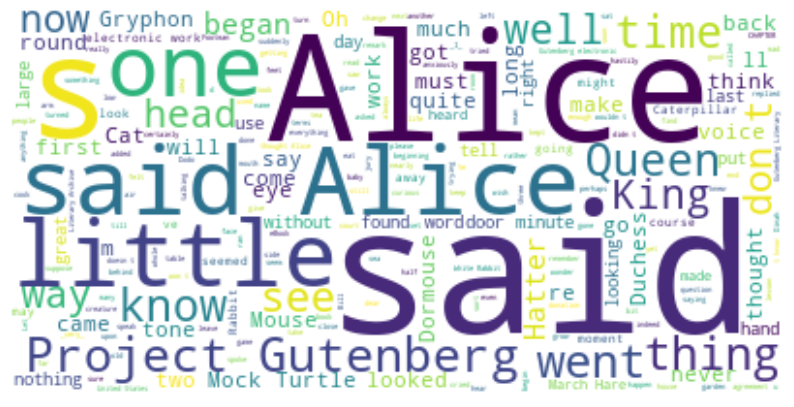

In [55]:
fig = plt.figure(figsize=(10, 14))

# display the cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Add the word *said* to the list of stopwords.

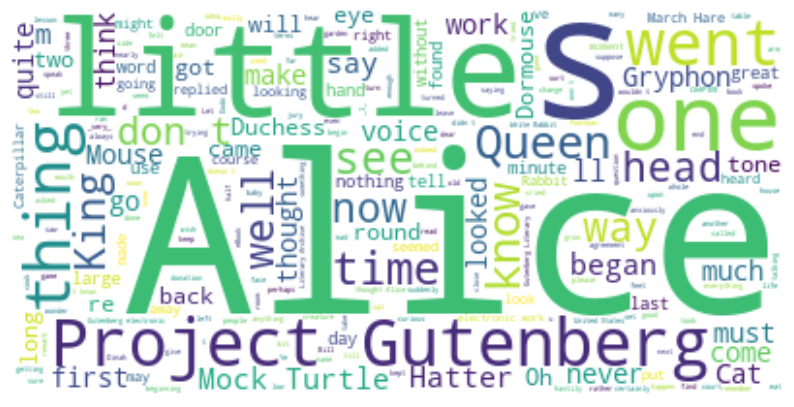

In [56]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
wordcloud.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(10, 14))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
# using the entire novel
# instantiate a word cloud object
wordcloud2 = WordCloud(
    background_color='white',    
    stopwords=stopwords
)

# generate the word cloud
wordcloud2.generate(alice_novel)

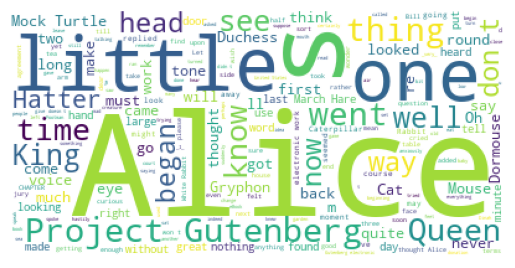

In [58]:
# display the cloud
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

With the `word_cloud` package, we can also superimpose the words onto a mask of any shape.

In [59]:
# save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://amueller.github.io/word_cloud/_images/sphx_glr_masked_002.png')))

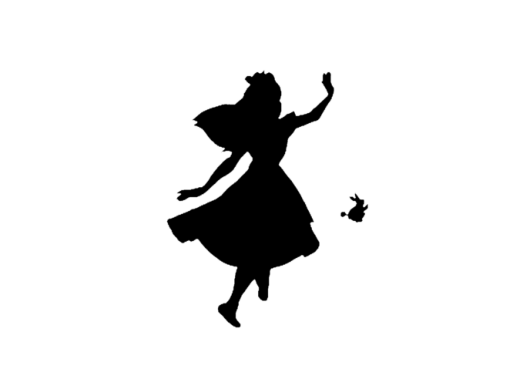

In [60]:
plt.imshow(alice_mask)
plt.axis('off')
plt.show()

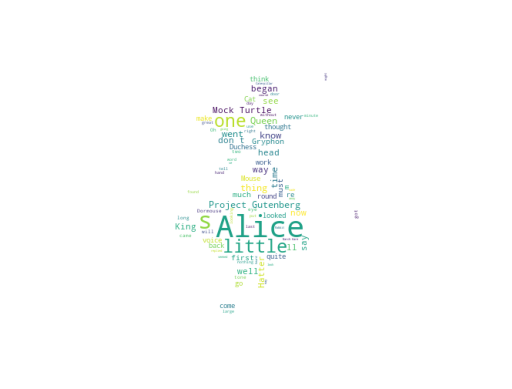

In [61]:
# instantiate a word cloud object using a mask
worldcloud3 = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
worldcloud3.generate(alice_novel)

# display the word cloud
plt.imshow(worldcloud3)
plt.axis('off')
plt.show()

Make it look a bit better:

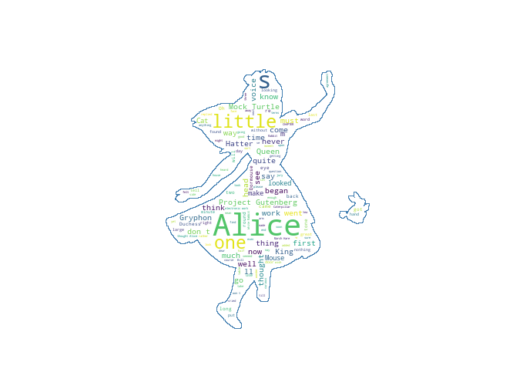

In [62]:
# instantiate a word cloud object using a mask
worldcloud3 = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords,
                        contour_width=1, contour_color='steelblue')

# generate the word cloud
worldcloud3.generate(alice_novel)


# store to file
worldcloud3.to_file("alice.png")

# display the word cloud
#fig = plt.figure(figsize=(14, 18))
plt.imshow(worldcloud3, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

**<p style="color:red">EXERCISE 3</p>**

Create several word clouds to analyze the text from a book selected from https://www.gutenberg.org/browse/scores/top#authors-last30 (for example: Dracula by Bram Stoker, https://www.gutenberg.org/cache/epub/345/pg345.txt).

1. The first word cloud should be a simple one, using all words from the book and the default stop words.
2. The second word cloud should consider adding at least 3 new stop words (selected based on the first word cloud), have a figure size of (10,12) and use a specific colormap (select it from https://matplotlib.org/stable/tutorials/colors/colormaps.html).
3. The third word cloud should be generated using a mask. Find a mask picture file online, suitable for the selected book.

In [62]:
# Your solution here...



## Word Clouds for the Canada Immigration Dataset

 We can generate sample text data from the immigration dataset.

In [63]:
df_canada.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Country                                       ...                           
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0   
Andorra            0     0     0     0     2  ...     0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Country                                              
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

In [64]:
# What is the total immigration?
total_immigration = df_canada['Total'].sum()
total_immigration

6409153

Using countries with single-word names, first we duplicate each country's name based on how much they contribute to the total immigration.

In [65]:
max_words = 90
word_string = ''
for country in df_canada.index.values:
    # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df_canada.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [66]:
len(word_string.split())

39

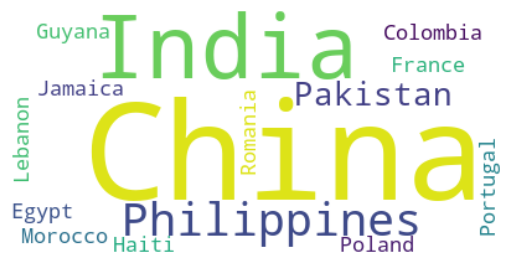

In [67]:
wordcloud = WordCloud(background_color='white').generate(word_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This word cloud shows the top 15 countries immigrating to Canada from 1980 to 2013.

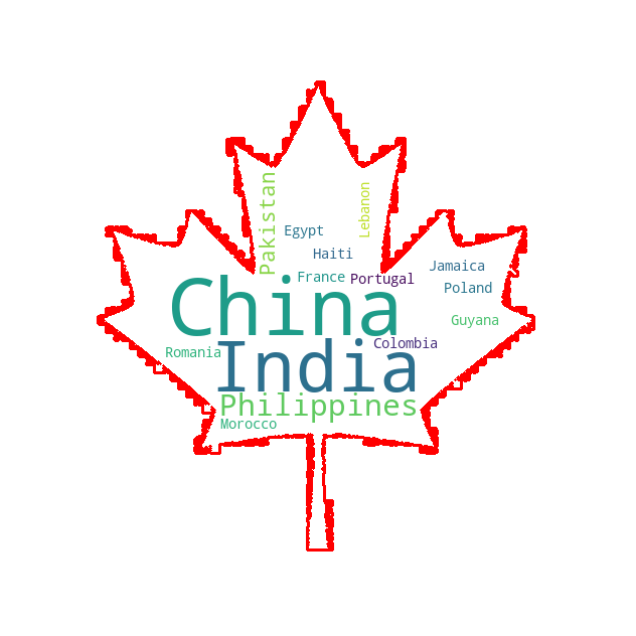

In [68]:
canada_mask = np.array(Image.open('canada_mask.png'))
#plt.imshow(canada_mask, cmap=plt.cm.gray, interpolation='bilinear')

wordcloud = WordCloud(background_color='white', mask=canada_mask, contour_width=3, contour_color='red').generate(word_string)
fig = plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()